In [153]:
# 필요한 utils
import pandas as pd
import numpy as np

import sys
sys.path.append("../3.src")
from utils import *

In [158]:
!cat ../3.src/utils.py

from IPython.display import display
import numpy as np


def eda_report(df, name=""):
    print(f"EDA Report for {name}")
    print(f"Shape: {df.shape}")
    display(df.head())
    df.info()
    display(df.describe())
    print(df.isnull().sum())


def building_age(df, year_col='건축년도', new_col='building_age'):
    df[new_col] = 2025 - df[year_col]
    return df


def cal_date_diff_weight(df, col='계약년월', new_col='date_diff'):
    df[col] = df[col].astype(str).str[:4].astype(int)
    df[new_col] = 2025 - df[col]
    return df


def prepare_submission(predictions, test_df):
    
    predictions_rounded = np.round(predictions).astype(int)
    
    # ② 행 수 일치 여부 확인
    assert len(predictions_rounded) == len(test_df), f"제출 행의 갯수 불일치! test_df={len(test_df)}, predictions={len(predictions_rounded)}"
    
    print(f"제출용 예측값 생성 완료. 행 개수 일치: {len(predictions_rounded)}")
    
    return predictions_rounded

In [9]:
# 3. csv 파일 불러오기
DATA_PATH = "/data/ephemeral/home/workspace/upstageailab-ml-competition-ml-2/1.Data/"
train_df = pd.read_csv(DATA_PATH + "train.csv")
test_df = pd.read_csv(DATA_PATH + "test.csv")

subway_df = pd.read_csv(DATA_PATH + "subway_feature.csv")
bus_df = pd.read_csv(DATA_PATH + "bus_feature.csv")

/tmp/ipykernel_358426/517515685.py:3: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(DATA_PATH + "train.csv")


In [10]:
display(train_df.shape, test_df.shape, subway_df.shape, bus_df.shape)
display(train_df.head(), subway_df.head(), bus_df.head())

(1118822, 52)

(9272, 51)

(768, 5)

(12584, 6)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000


,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387


,노드 ID,정류소번호,정류소명,X좌표,Y좌표,정류소 타입
0,100000001,1001,종로2가사거리,126.987752,37.569808,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582581,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로


In [11]:
display(train_df.info())
display(subway_df.info())
display(bus_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1118822 non-null  object 
 1   번지                      1118597 non-null  object 
 2   본번                      1118747 non-null  float64
 3   부번                      1118747 non-null  float64
 4   아파트명                    1116696 non-null  object 
 5   전용면적(㎡)                 1118822 non-null  float64
 6   계약년월                    1118822 non-null  int64  
 7   계약일                     1118822 non-null  int64  
 8   층                       1118822 non-null  int64  
 9   건축년도                    1118822 non-null  int64  
 10  도로명                     1118822 non-null  object 
 11  해제사유발생일                 5983 non-null     float64
 12  등기신청일자                  1118822 non-null  object 
 13  거래유형                    1118822 non-null  object 
 14  중개

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역사_ID   768 non-null    int64  
 1   역사명     768 non-null    object 
 2   호선      768 non-null    object 
 3   위도      768 non-null    float64
 4   경도      768 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 30.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12584 entries, 0 to 12583
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   노드 ID   12584 non-null  int64  
 1   정류소번호   12584 non-null  int64  
 2   정류소명    12584 non-null  object 
 3   X좌표     12584 non-null  float64
 4   Y좌표     12584 non-null  float64
 5   정류소 타입  12584 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 590.0+ KB


None

In [12]:
eda_report(train_df, "Train Data")

EDA Report for Train Data
Shape: (1118822, 52)


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1118822 non-null  object 
 1   번지                      1118597 non-null  object 
 2   본번                      1118747 non-null  float64
 3   부번                      1118747 non-null  float64
 4   아파트명                    1116696 non-null  object 
 5   전용면적(㎡)                 1118822 non-null  float64
 6   계약년월                    1118822 non-null  int64  
 7   계약일                     1118822 non-null  int64  
 8   층                       1118822 non-null  int64  
 9   건축년도                    1118822 non-null  int64  
 10  도로명                     1118822 non-null  object 
 11  해제사유발생일                 5983 non-null     float64
 12  등기신청일자                  1118822 non-null  object 
 13  거래유형                    1118822 non-null  object 
 14  중개

,본번,부번,전용면적(㎡),계약년월,계약일,층,건축년도,해제사유발생일,단지소개기존clob,k-전체동수,...,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target
count,1.118747e+06,1.118747e+06,1.118822e+06,1.118822e+06,1.118822e+06,1.118822e+06,1.118822e+06,5.983000e+03,68582.000000,248192.000000,...,249259.000000,249214.000000,249214.000000,249214.000000,327.0,2.491080e+05,249108.000000,249152.000000,249152.000000,1.118822e+06
mean,5.649108e+02,5.978885e+00,7.717475e+01,2.014760e+05,1.580656e+01,8.871968e+00,1.998755e+03,2.021057e+07,541.529979,14.798346,...,120726.487549,477.912838,476.713439,167.528470,70.0,1.895070e+05,1063.678778,126.995228,37.545785,5.799153e+04
std,5.160642e+02,4.668584e+01,2.936423e+01,4.187868e+02,8.721166e+00,5.982584e+00,9.333908e+00,1.060697e+04,751.809853,17.693533,...,129020.276480,759.909400,727.553569,248.928143,0.0,1.729027e+06,1235.437604,0.091045,0.052483,4.642602e+04
min,0.000000e+00,0.000000e+00,1.002000e+01,2.007010e+05,1.000000e+00,-4.000000e+00,1.961000e+03,2.020022e+07,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,70.0,0.000000e+00,0.000000,126.798318,37.447843,3.500000e+02
25%,1.760000e+02,0.000000e+00,5.965000e+01,2.011100e+05,8.000000e+00,4.000000e+00,1.992000e+03,2.020082e+07,4.000000,5.000000,...,40735.000000,48.000000,95.000000,0.000000,70.0,0.000000e+00,315.000000,126.913157,37.499201,3.050000e+04
50%,4.700000e+02,0.000000e+00,8.188000e+01,2.015070e+05,1.600000e+01,8.000000e+00,2.000000e+03,2.021030e+07,174.000000,10.000000,...,78125.000000,225.000000,256.000000,63.000000,70.0,1.710550e+03,683.000000,127.014971,37.544936,4.480000e+04
75%,7.810000e+02,1.000000e+00,8.496000e+01,2.018040e+05,2.300000e+01,1.200000e+01,2.005000e+03,2.022021e+07,725.000000,17.000000,...,159544.000000,576.000000,582.000000,237.000000,70.0,8.414210e+03,1274.000000,127.059590,37.577117,6.980000e+04
max,4.974000e+03,2.837000e+03,4.243200e+02,2.023060e+05,3.100000e+01,6.900000e+01,2.023000e+03,2.023093e+07,2888.000000,124.000000,...,969877.000000,4975.000000,5132.000000,1500.000000,70.0,3.159620e+07,12096.000000,127.179998,37.687725,1.450000e+06


시군구                             0
번지                            225
본번                             75
부번                             75
아파트명                         2126
전용면적(㎡)                         0
계약년월                            0
계약일                             0
층                               0
건축년도                            0
도로명                             0
해제사유발생일                   1112839
등기신청일자                          0
거래유형                            0
중개사소재지                          0
k-단지분류(아파트,주상복합등등)         870691
k-전화번호                     870274
k-팩스번호                     872742
단지소개기존clob                1050240
k-세대타입(분양형태)               869563
k-관리방식                     869563
k-복도유형                     869890
k-난방방식                     869563
k-전체동수                     870630
k-전체세대수                    869563
k-건설사(시공사)                 871058
k-시행사                      871254
k-사용검사일-사용승인일              869696
k-연면적                      869563
k-주거전용면적      

In [13]:
# train 데이터와 test 데이터 하나로 합치기! 
train_df['is_train'] = 1
test_df['is_train'] = 0
all_df = pd.concat([train_df, test_df], ignore_index= True)

In [14]:
all_df['is_train'].value_counts()   

1    1118822
0       9272
Name: is_train, dtype: int64

In [15]:
all_df = all_df.rename(columns={'전용면적(㎡)': '전용면적'})

In [16]:
eda_report(all_df, "all data")
# all_df['전용면적'].value_counts()   

EDA Report for all data
Shape: (1128094, 53)


,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_train
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null  float64
 3   부번                      1128019 non-null  float64
 4   아파트명                    1125958 non-null  object 
 5   전용면적                    1128094 non-null  float64
 6   계약년월                    1128094 non-null  int64  
 7   계약일                     1128094 non-null  int64  
 8   층                       1128094 non-null  int64  
 9   건축년도                    1128094 non-null  int64  
 10  도로명                     1128094 non-null  object 
 11  해제사유발생일                 6195 non-null     float64
 12  등기신청일자                  1128094 non-null  object 
 13  거래유형                    1128094 non-null  object 
 14  중개

,본번,부번,전용면적,계약년월,계약일,층,건축년도,해제사유발생일,단지소개기존clob,k-전체동수,...,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_train
count,1.128019e+06,1.128019e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,6.195000e+03,69136.000000,250887.000000,...,251924.000000,251924.000000,251924.000000,329.0,2.518150e+05,251817.000000,251862.000000,251862.000000,1.118822e+06,1.128094e+06
mean,5.653234e+02,5.976400e+00,7.716028e+01,2.014829e+05,1.579966e+01,8.881412e+00,1.998791e+03,2.021126e+07,541.272911,14.810871,...,478.582326,478.585657,167.784911,70.0,1.904915e+05,1068.300798,126.995315,37.545760,5.799153e+04,9.917808e-01
std,5.167611e+02,4.674920e+01,2.936448e+01,4.237691e+02,8.722162e+00,5.989302e+00,9.358540e+00,1.105703e+04,751.682988,17.682771,...,758.970556,731.168009,249.626494,0.0,1.735029e+06,1247.315587,0.091001,0.052457,4.642602e+04,9.028635e-02
min,0.000000e+00,0.000000e+00,1.002000e+01,2.007010e+05,1.000000e+00,-4.000000e+00,1.961000e+03,2.020022e+07,1.000000,1.000000,...,0.000000,0.000000,0.000000,70.0,0.000000e+00,0.000000,126.798318,37.447843,3.500000e+02,0.000000e+00
25%,1.770000e+02,0.000000e+00,5.965000e+01,2.011110e+05,8.000000e+00,4.000000e+00,1.992000e+03,2.020083e+07,4.000000,5.000000,...,48.000000,95.000000,0.000000,70.0,0.000000e+00,316.000000,126.913157,37.498830,3.050000e+04,1.000000e+00
50%,4.710000e+02,0.000000e+00,8.187000e+01,2.015080e+05,1.600000e+01,8.000000e+00,2.000000e+03,2.021032e+07,159.000000,10.000000,...,226.000000,258.000000,64.000000,70.0,1.735000e+03,683.000000,127.014971,37.544936,4.480000e+04,1.000000e+00
75%,7.810000e+02,1.000000e+00,8.496000e+01,2.018050e+05,2.300000e+01,1.200000e+01,2.005000e+03,2.022050e+07,725.000000,17.000000,...,576.000000,582.000000,237.000000,70.0,8.414210e+03,1284.000000,127.059590,37.577117,6.980000e+04,1.000000e+00
max,4.974000e+03,2.837000e+03,4.243200e+02,2.023090e+05,3.100000e+01,6.900000e+01,2.023000e+03,2.023093e+07,2888.000000,124.000000,...,4975.000000,5132.000000,1500.000000,70.0,3.159620e+07,12096.000000,127.179998,37.687725,1.450000e+06,1.000000e+00


시군구                             0
번지                            227
본번                             75
부번                             75
아파트명                         2136
전용면적                            0
계약년월                            0
계약일                             0
층                               0
건축년도                            0
도로명                             0
해제사유발생일                   1121899
등기신청일자                          0
거래유형                            0
중개사소재지                          0
k-단지분류(아파트,주상복합등등)         877273
k-전화번호                     876850
k-팩스번호                     879348
단지소개기존clob                1058958
k-세대타입(분양형태)               876125
k-관리방식                     876125
k-복도유형                     876454
k-난방방식                     876125
k-전체동수                     877207
k-전체세대수                    876125
k-건설사(시공사)                 877637
k-시행사                      877834
k-사용검사일-사용승인일              876259
k-연면적                      876125
k-주거전용면적      

In [17]:
# 결측치, 이상치 처리 보다 featrure engineering 먼저 진행해보기로 결정 (파생 변수 생성)

# 파생 변수 1. building_age
all_df['building_age'] = all_df['건축년도'].apply(lambda x : 2025 - x if x != 0 else 0)

In [48]:
# 파생 변수 1. building_age 확인
all_df['building_age'].value_counts()

21    68919
22    66039
26    60262
25    57250
37    55953
20    48648
27    44325
24    42574
28    42531
23    42174
17    37540
19    35168
33    32792
29    32341
32    30694
18    29929
30    27218
31    25902
38    25781
16    24260
36    23829
39    23494
15    21178
14    20480
11    17433
13    16555
35    15800
34    15336
42    14293
12    13559
43    11800
41    10671
45     9820
10     8965
9      8558
47     8128
40     8097
46     7069
44     5225
6      5195
7      5106
8      4869
51     3444
5      3084
49     2665
54     2407
48     2329
50     2187
4      1951
52     1049
3       761
55      689
53      685
56      537
57      253
59      105
2        99
64       55
58       17
60       17
Name: building_age, dtype: int64

In [18]:
# 파생 변수 2. years_diff_since_contract
all_df['years_diff_since_contract'] = np.where(
    (all_df['계약년월'].notnull()) & (all_df['계약년월'] != 0)
    ,2025 - all_df['계약년월'].astype(str).str[:4].astype(int)
    ,0
)

    

# all_df['years_diff_since_contract'] = all_df['계약년월'].apply(lambda x : 2025 - int(str(x)[:4]) if pd.notnull(x) and x != 0 else 0)

In [49]:
# 파생 변수 2. years_diff_since_contract 확인
all_df['years_diff_since_contract'].value_counts()

10    119891
8     104893
9      99253
11     85130
5      83711
7      81413
6      74696
16     73491
12     67865
18     58767
17     57012
14     54513
15     44457
4      43117
13     40851
2      26820
3      12214
Name: years_diff_since_contract, dtype: int64

In [19]:
# 파생 변수 3. parking_per_household
all_df['parking_per_household'] = np.where(
    (all_df['주차대수'].notnull()) & (all_df['k-전체세대수'].notnull()) & (all_df['k-전체세대수'] != 0),
    all_df['주차대수'] / all_df['k-전체세대수'],
    0        
) 

In [50]:
# 파생 변수 3. parking_per_household 확인
all_df['parking_per_household'].value_counts()

0.000000    894418
0.000397      2816
0.944593      2605
0.682866      2592
0.382244      2480
             ...  
1.852227         2
1.314655         2
0.596091         2
1.016461         1
0.260215         1
Name: parking_per_household, Length: 673, dtype: int64

In [65]:
# mask = all_df['좌표X'].isnull() | all_df['좌표Y'].isnull()

# null_counts_x = all_df['좌표X'].isnull().groupby(all_df['is_train']).sum()
# null_counts_y = all_df['좌표Y'].isnull().groupby(all_df['is_train']).sum()
# print("결측치 개수(x.y) : "  , null_counts_x )

# display(all_df[mask][['좌표X', 'is_train', '좌표Y']])
# display(all_df.loc[mask, ['is_train', '좌표X', '좌표Y']])

결측치 개수(x.y) :  is_train
0      6562
1    869670
Name: 좌표X, dtype: int64


In [20]:
valid_mask = all_df[['좌표X', '좌표Y']].notnull().all(axis=1)
valid_rows = all_df[valid_mask]

In [21]:
# 파생 변수 4. nearnest_distance_to_bus  &  num_bus_stops_within_1000m
from sklearn.neighbors import BallTree

valid_mask = all_df[['좌표X', '좌표Y']].notnull().all(axis=1)
valid_rows = all_df[valid_mask].copy()

bus_radians = np.radians(bus_df[['Y좌표', 'X좌표']].values)
valid_radians = np.radians(valid_rows[['좌표Y', '좌표X']].values)

tree = BallTree(bus_radians, metric='haversine')

# 1)  nearnest_distance_to_bus 
distances, indices = tree.query(valid_radians, k=1)

valid_rows['nearnest_distance_to_bus'] = distances[:, 0] * 6371  

all_df.loc[valid_mask, 'nearnest_distance_to_bus'] = valid_rows['nearnest_distance_to_bus']
all_df.loc[~valid_mask, 'nearnest_distance_to_bus'] = 9999

# 2) num_bus_stops_within_1000m
radius_km = 1.0
radius_rad = radius_km / 6371.0  

indices_array = tree.query_radius(valid_radians, r=radius_rad)

valid_rows['num_bus_stops_within_1000m'] = [len(indices) for indices in indices_array]

all_df['num_bus_stops_within_1000m'] = 0
all_df.loc[valid_mask, 'num_bus_stops_within_1000m'] = valid_rows['num_bus_stops_within_1000m'].values



In [54]:
# 파생 변수 4. nearnest_distance_to_bus  &  num_bus_stops_within_1000m 확인
# all_df[(all_df['nearnest_distance_to_bus']!=9999) & (all_df['num_bus_stops_within_1000m']!= 0)][[
#     'is_train',
#     'nearnest_distance_to_bus',
#     'num_bus_stops_within_1000m'
# ]].value_counts()

filtered_df = all_df[(all_df['nearnest_distance_to_bus']!=9999) & (all_df['num_bus_stops_within_1000m']!= 0)]

null_check_mask = (
    filtered_df['nearnest_distance_to_bus'].isnull() |
    filtered_df['num_bus_stops_within_1000m'].isnull() 
)

print(null_check_mask.sum())




0


In [22]:
# 파생 변수 5. nearnest_distance_to_subway   &  num_subway_within_1000m

valid_mask = all_df[['좌표X', '좌표Y']].notnull().all(axis=1)
valid_rows = all_df[valid_mask].copy()

subway_radians = np.radians(subway_df[['위도', '경도']].values)
valid_radians = np.radians(valid_rows[['좌표Y', '좌표X']].values)

tree = BallTree(subway_radians, metric='haversine')

# 1)  nearnest_distance_to_subway 
distances, indices = tree.query(valid_radians, k=1)

valid_rows['nearnest_distance_to_subway'] = distances[:, 0] * 6371  

all_df.loc[valid_mask, 'nearnest_distance_to_subway'] = valid_rows['nearnest_distance_to_subway']
all_df.loc[~valid_mask, 'nearnest_distance_to_subway'] = 9999




# 2) num_subway_within_1000m
radius_km = 1.0
radius_rad = radius_km / 6371.0  

indices_array = tree.query_radius(valid_radians, r=radius_rad)

valid_rows['num_subway_within_1000m'] = [len(indices) for indices in indices_array]

all_df['num_subway_within_1000m'] = 0
all_df.loc[valid_mask, 'num_subway_within_1000m'] = valid_rows['num_bus_stops_within_1000m'].values

In [55]:
# 파생 변수 5. nearnest_distance_to_subway   &  num_subway_within_1000m 확인

filtered_df = all_df[(all_df['nearnest_distance_to_subway']!=9999 ) & (all_df['num_subway_within_1000m'] !=0) ]
null_check_mask =(
    filtered_df['nearnest_distance_to_subway'].isnull() |
    filtered_df['num_subway_within_1000m'].isnull()
)

print(null_check_mask.sum())


0


In [23]:
%pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [71]:
# 파생 변수 6. dist_to_CBD,  dist_to_Gangnam, dist_to_Yeouido
from haversine import haversine

center_coords = {
    'CBD':     (37.5714, 126.9768),
    'Gangnam': (37.4979, 127.0276),
    'Yeouido': (37.5219, 126.9245)
}

all_df['dist_to_CBD'] = all_df.apply(lambda row : haversine((row['좌표Y'], row['좌표X']), center_coords['CBD']) if pd.notnull(row['좌표X']) and pd.notnull(row['좌표Y']) else 9999, axis=1)
all_df['dist_to_Gangnam'] = all_df.apply(lambda row : haversine((row['좌표Y'], row['좌표X']), center_coords['Gangnam']) if pd.notnull(row['좌표X']) and pd.notnull(row['좌표Y']) else 9999 , axis=1)
all_df['dist_to_Yeouido'] = all_df.apply(lambda row : haversine((row['좌표Y'], row['좌표X']), center_coords['Yeouido']) if pd.notnull(row['좌표X']) and pd.notnull(row['좌표Y']) else 9999 , axis=1)


Correlation with target:
 building_age                  -0.056041
years_diff_since_contract     -0.344328
parking_per_household          0.204521
nearnest_distance_to_bus      -0.120850
num_bus_stops_within_1000m     0.075198
nearnest_distance_to_subway   -0.120853
num_subway_within_1000m        0.075198
dist_to_CBD                   -0.120862
dist_to_Gangnam               -0.120997
dist_to_Yeouido               -0.120881
dtype: float64


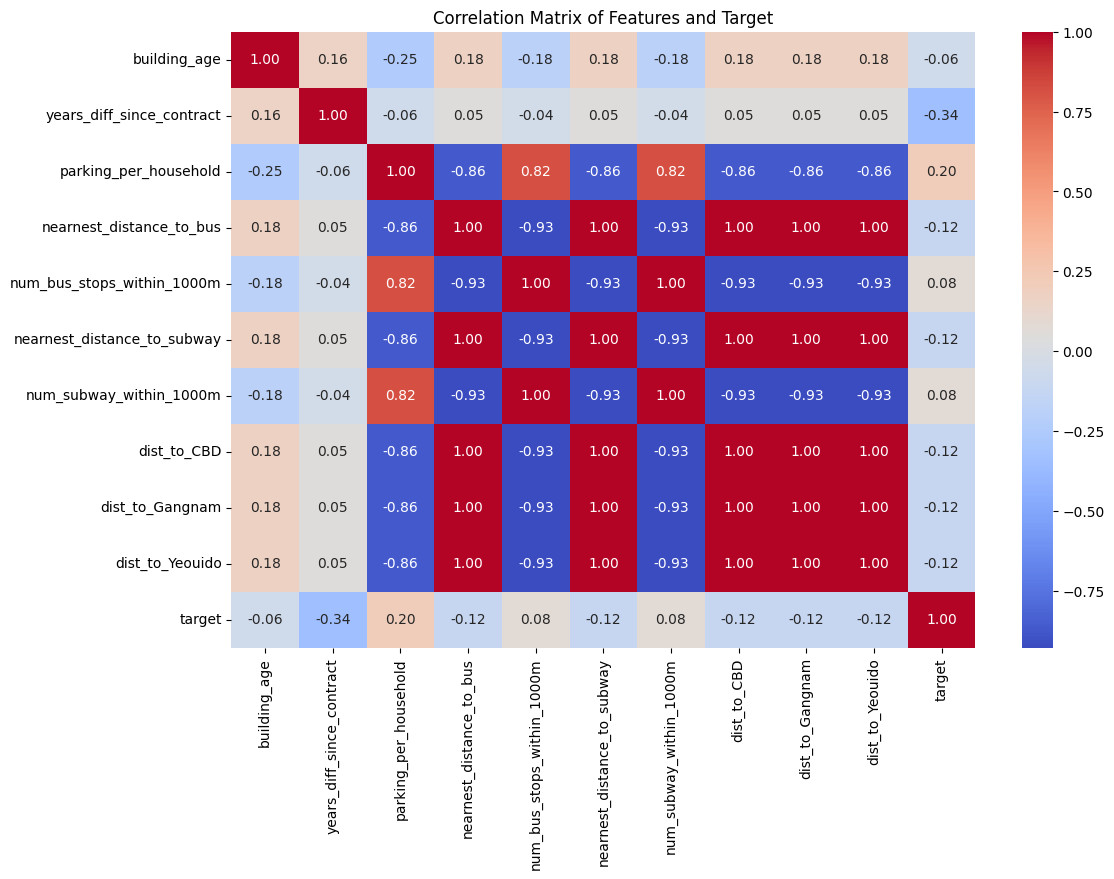

In [73]:
# 생성한 파생변수와 target 과의 상관관계 분석해보기!!!
# 
# 파생 변수 1. building_age
# 파생 변수 2. years_diff_since_contract
# 파생 변수 3. parking_per_household
# 파생 변수 4. nearnest_distance_to_bus  &  num_bus_stops_within_1000m
# 파생 변수 5. nearnest_distance_to_subway   &  num_subway_within_1000m
# 파생 변수 6. dist_to_CBD,  dist_to_Gangnam, dist_to_Yeouido

import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = all_df[all_df['is_train'] == 1]

cols = [
    'building_age', 'years_diff_since_contract', 'parking_per_household',
    'nearnest_distance_to_bus', 'num_bus_stops_within_1000m',
    'nearnest_distance_to_subway', 'num_subway_within_1000m',
    'dist_to_CBD', 'dist_to_Gangnam', 'dist_to_Yeouido',
    'target'
]

print("Correlation with target:\n", filtered_df[
    ['building_age', 'years_diff_since_contract', 'parking_per_household',
    'nearnest_distance_to_bus', 'num_bus_stops_within_1000m',
    'nearnest_distance_to_subway', 'num_subway_within_1000m',
    'dist_to_CBD', 'dist_to_Gangnam', 'dist_to_Yeouido']
    ].corrwith(filtered_df['target']))

corr_matrix = filtered_df[cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target')
plt.show()

In [ ]:
# EDA  1) 결측치 : 80% 이하만 데이터로 활용!  all_df_no_nan
missing_check_mask = all_df.isnull() | all_df.isna() | (all_df == ' ') | (all_df == '-') | (all_df == 'nan')

missing_counts = missing_check_mask.sum()
missing_ratio = missing_counts / len(all_df) 

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Ratio': missing_ratio
})

# print(missing_summary.sort_values(by='Missing Ratio', ascending=False).head(20))

columns_to_keep = missing_ratio[missing_ratio < 0.8].index
# print(columns_to_keep)

all_df_no_nan = all_df[columns_to_keep]




In [80]:
# EDA  2) 본번, 부번 float → str
all_df_no_nan['본번'] = all_df_no_nan['본번'].astype(str)
all_df_no_nan['부번'] = all_df_no_nan['부번'].astype(str)

/tmp/ipykernel_358426/2481449493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_no_nan['본번'] = all_df_no_nan['본번'].astype(str)
/tmp/ipykernel_358426/2481449493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_no_nan['부번'] = all_df_no_nan['부번'].astype(str)


In [87]:
# EDA  3) 결측치 보간
all_df_no_nan.isnull().sum().sort_values(ascending=False)

continous_cols =[]
categorical_cols =[]

for col in all_df_no_nan.columns:
    if pd.api.types.is_numeric_dtype(all_df_no_nan[col]):
        continous_cols.append(col)
    else:
        categorical_cols.append(col)
            


In [88]:
# EDA  3) 결측치 보간 - 범주형은 null 로 , 수치형은 선형보간으로

# 범주형은 null
all_df_no_nan[categorical_cols] = all_df_no_nan[categorical_cols].fillna('NULL')

# 수치형은 선형 보간
all_df_no_nan[continous_cols] = all_df_no_nan[continous_cols].interpolate(method='linear', axis=0)

/tmp/ipykernel_358426/3439374655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_no_nan[categorical_cols] = all_df_no_nan[categorical_cols].fillna('NULL')
/tmp/ipykernel_358426/3439374655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_no_nan[continous_cols] = all_df_no_nan[continous_cols].interpolate(method='linear', axis=0)


In [101]:
# EDA  4) 이상치 제거 - IQR (all_df_no_nan 에서 is_train ==1 인 데이터에서만 이상치 행을 제거!!)

def remove_outliers_iqr(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

# is_train ==1 인 데이터에서만   전용면적에 대한 이상치 제거
final_df = pd.concat([
    all_df_no_nan[all_df_no_nan['is_train']==0] 
    ,remove_outliers_iqr(all_df_no_nan[all_df_no_nan['is_train']== 1], '전용면적')
    ])



In [102]:
#  is_train == 1 인 데이터에서만 이상치가 제거 되었는지 확인
print(all_df_no_nan[all_df_no_nan['is_train']==0].shape, all_df_no_nan[all_df_no_nan['is_train']==1].shape, 
      final_df[final_df['is_train']==0].shape, 
      final_df[final_df['is_train']==1].shape,
      final_df.shape)

(9272, 54) (1118822, 54) (9272, 54) (1029574, 54) (1038846, 54)


In [105]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# EDA  5) 범주형 변수 처리 - label encoding
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder


In [107]:
# 나중에 후처리/복원/변환할 때 재사용하기 위해 컬럼 별로 학습된 label endocer 객체를 딕셔너리에 저장!
label_encoders ={}

final_train = final_df[final_df['is_train'] == 1].copy()
final_test = final_df[final_df['is_train'] == 0].copy()

for col in tqdm(categorical_cols):
    le = LabelEncoder()

    le.fit(final_train[col].astype(str))
    final_train[col] =le.transform(final_train[col].astype(str))
    label_encoders[col] = le

    for label in final_test[col].unique():
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)

    final_test[col] = le.transform(final_test[col].astype(str))        


100%|██████████| 25/25 [00:05<00:00,  4.33it/s]


In [108]:
#  여기까지 전처리 및 feature engineering 한 데이터 final_df 를 csv 로 백업!
final_df =pd.concat([final_train, final_test], ignore_index=True)
final_df.to_csv(DATA_PATH + "final_all.csv", index=False)


In [115]:
assert final_train.shape[1] == final_test.shape[1], "Check the number of columns!"

In [ ]:
# final_df 에서 is_train 으로 train 과 test 분리 → 다시 final_train 에서 target과  → train 데이터에서만 모델을 학습시켜야 함!!
# 모델 선택 ( RandomForest ) → model training 을 위해 tartget 과 독립 변수 분리 & 학습 데이터와 검증데이터를 8:2 비율로 나눔


In [116]:
# 모델 선택
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# train 데이터를  target과 그 외 독립변수로 분리
y_output = final_train['target']
X_input = final_train.drop(columns=['target'], axis=1)

X_training, X_validation, y_training, y_validation = train_test_split(X_input, y_output, test_size=0.2, random_state=2025)

# 모델 생성
model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    random_state=2025,
    n_jobs=-1,
)

model.fit(X_training, y_training)

# 예측
y_pred = model.predict(X_validation)

# 평가
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
print(f"my model Validation RMSE : {rmse:.2f}")

# 결과 : my model Validation RMSE : 4937.75

my model Validation RMSE : 4937.75


In [121]:
# 그래프 한글 폰트 깨짐
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

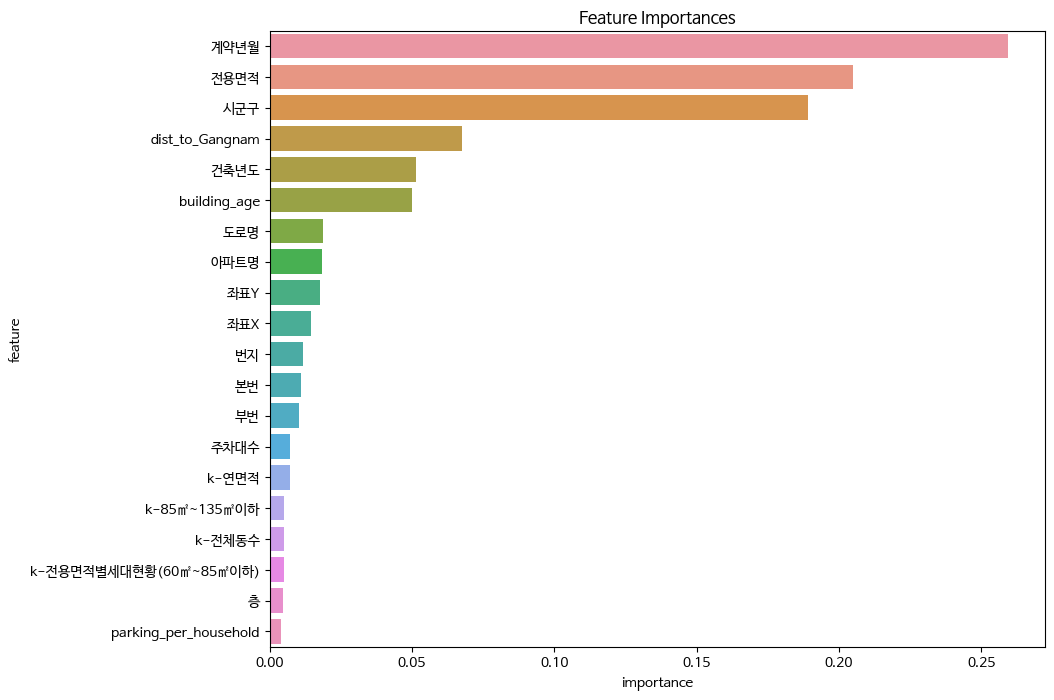

In [122]:
# 모델 생성 및 예측/평가 후, 
#  Feature Importance 시각화 진행 → 나의 변수 중 중요한게 뭔지 해석 하고 불필요한 변수들은 제거

importances = model.feature_importances_
feature_names = X_training.columns

imp = pd.DataFrame({
    'feature': feature_names,
    'importance' : importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
sns.barplot(x='importance', y='feature', data=imp.head(20))
plt.show()

In [124]:
# permutation importance 로 중요한 feature 확인 및 불필요 feature 제거
# from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance

In [126]:
perm = PermutationImportance(
    model,
    scoring = 'neg_mean_squared_error',
    random_state=2025,
    n_iter = 5
).fit(X_validation, y_validation)

eli5.show_weights(perm, feature_names = X_validation.columns.tolist())  

#############################################################################################
# 추후 permutation Imporatance 의 주요 변수 10개로만 모델을 학습해본 뒤, rmse 비교해보기!
# 일단은 Residual 분석 → 이상패턴 파악 & 로그변환 실험 먼저 해보기
# ###########################################################################################

Weight,Feature
870210702.2026 ± 4977468.1140,계약년월
585252381.7168 ± 9734169.2410,시군구
523906144.3775 ± 6044657.6317,전용면적
147619499.0637 ± 2273878.6273,dist_to_Gangnam
72391884.4248 ± 578241.4933,건축년도
70371207.0477 ± 1052480.5796,building_age
56325532.4289 ± 873364.4712,좌표Y
39234846.5419 ± 840503.5338,도로명
37886278.5933 ± 944366.1023,아파트명
28642951.9066 ± 695867.1479,좌표X


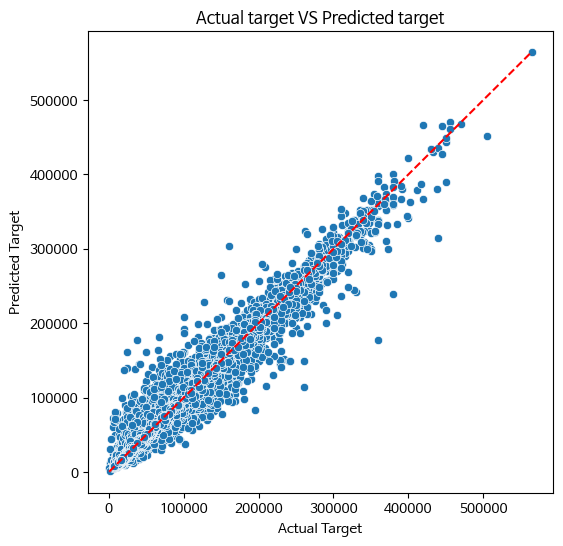

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


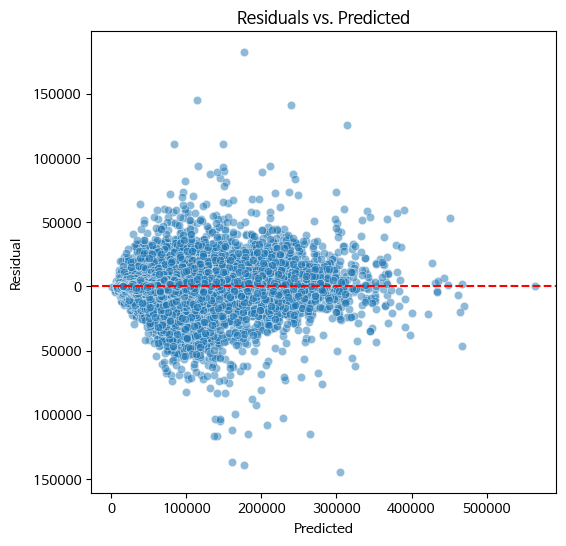

In [130]:


# Actual target VS Predicted target
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_validation, y=y_pred)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'r--')
plt.title('Actual target VS Predicted target')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.show()

# residual 
residuals = y_validation - y_pred
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted')
plt.show()

In [131]:
#  target 이 가격 변수이기 때문에 , 비싼 집일 수록 mse 가 커지고 중요도가 높아져 모델 학습에 방해!
#  target 의 가격을 log 로 눌러주는 작업 필요

y_training_log = np.log1p(y_training)
y_validation_log = np.log1p(y_validation)

print(y_training.head(),  y_training_log.head())

481881     60000.0
645590     35500.0
316367    141400.0
393529    185000.0
829020    122000.0
Name: target, dtype: float64 481881    11.002117
645590    10.477316
316367    11.859355
393529    12.128117
829020    11.711785
Name: target, dtype: float64


In [136]:
# 모델 재생성, 재학습, 재예측 (y_training_log , y_validation_log )

rf_log_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    random_state=2025,
    n_jobs=-1
)

rf_log_model.fit(X_training, y_training_log)


RandomForestRegressor(n_jobs=-1, random_state=2025)

In [135]:
y_pred_log = rf_log_model.predict(X_validation)
y_pred_log_inverse = np.expm1(y_pred_log)

print(y_pred_log[:5])
print(y_pred_log_inverse[:5])

# log 변환 작업을 통해 예측해본 값과 기존 y_validation 과의 rmse 
rmse_log = np.sqrt(mean_squared_error(y_validation, y_pred_log_inverse))

print(f"my model Validation RMSE after log transformation: {rmse_log:.2f}")

# Before : my model Validation RMSE : 4937.75
# After : Validation RMSE after log transformation: 4947.70

[11.33631004 10.98082444 11.40135321 10.00319822 11.29242661]
[83809.2037159  58735.95936503 89441.67646651 22096.02412932
 80210.85550568]
my model Validation RMSE after log transformation: 4947.70


In [142]:
#  permutation Importance 로 구한 상위 15개의 feature만 골라서 모델 재생성
importance_df = pd.DataFrame({
    'feature' : X_validation.columns,
    'importance' : perm.feature_importances_
})

top_15_features = importance_df.sort_values(by='importance', ascending=False).head(15)['feature'].tolist()

X_training_top15 = X_training[top_15_features]
X_validation_top15 = X_validation[top_15_features]

rf_top15_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    random_state= 2025,
    n_jobs=-1
)

rf_top15_model.fit(X_training_top15, y_training)




RandomForestRegressor(n_jobs=-1, random_state=2025)

In [143]:
rf_top15_pred = rf_top15_model.predict(X_validation_top15)

rf_top15_rmse = np.sqrt(mean_squared_error(y_validation, rf_top15_pred))


print(f"my model Validation RMSE after top 15 feature selection: {rf_top15_rmse:.2f}")

# Before : my model Validation RMSE : 4937.75
# After_log : Validation RMSE after log transformation: 4947.70
# After_top 15 feature selection : 5068.16


my model Validation RMSE after top 15 feature selection: 5068.16


In [144]:
# log & top15 동시 적용 모델
rf_log_top15_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    random_state=2025,
    n_jobs=-1
)

rf_log_top15_model.fit(X_training_top15, y_training_log)

RandomForestRegressor(n_jobs=-1, random_state=2025)

In [145]:
rf_log_top15_pred = rf_log_top15_model.predict(X_validation_top15)
rf_log_top15_pred_inverse = np.expm1(rf_log_top15_pred)

print(rf_log_top15_pred[:5])
print(rf_log_top15_pred_inverse[:5])

# log 변환 작업을 통해 예측해본 값과 기존 y_validation 과의 rmse 
rmse_log_top15_pred_inverse = np.sqrt(mean_squared_error(y_validation, rf_log_top15_pred_inverse))

print(f"my model Validation RMSE after log & top 15 feature selection: {rmse_log_top15_pred_inverse:.2f}")

# Before : my model Validation RMSE : 4937.75
# After_log : Validation RMSE after log transformation: 4947.70
# After_top 15 feature selection : 5068.16
# After_log & top 15 feature selection : 5028.77



[11.33086584 10.92783754 11.39647205  9.9920537  11.33796873]
[83354.16413918 55704.68786384 89006.15571961 21851.13044959
 83948.33409612]
my model Validation RMSE after log & top 15 feature selection: 5028.77


In [149]:
# After_log 모델과 After_log & top 15 feature selection 모델 둘 다 제출해보기!
final_test_without_target = final_test.drop(columns=['target'], axis=1)

after_log_transform_pred = rf_log_model.predict(final_test_without_target)
after_log_transform_pred = np.expm1(after_log_transform_pred)

after_log_top15_pred = rf_log_top15_model.predict(final_test_without_target[top_15_features])
after_log_top15_pred = np.expm1(after_log_top15_pred)

In [161]:

def prepare_submission(predictions, test_df):
    
    predictions_rounded = np.round(predictions).astype(int)
    
    # ② 행 수 일치 여부 확인
    assert len(predictions_rounded) == len(test_df), f"제출 행의 갯수 불일치! test_df={len(test_df)}, predictions={len(predictions_rounded)}"
    
    print(f"제출용 예측값 생성 완료. 행 개수 일치: {len(predictions_rounded)}")
    
    return predictions_rounded

In [165]:
after_log_transform_pred= prepare_submission(after_log_transform_pred, test_df)


제출용 예측값 생성 완료. 행 개수 일치: 9272


In [166]:
after_log_top15_pred = prepare_submission(after_log_top15_pred, test_df)

제출용 예측값 생성 완료. 행 개수 일치: 9272


In [169]:
submission_log = pd.DataFrame({
    'target':after_log_transform_pred
})

submission_log_top15 = pd.DataFrame({
    'target':after_log_top15_pred
})

print(submission_log.dtypes ,  '\n', submission_log_top15.dtypes)

target    int64
dtype: object 
 target    int64
dtype: object


In [ ]:
submission_log.to_csv('/data/ephemeral/home/workspace/upstageailab-ml-competition-ml-2/4.Submission/sub_250713_rf_v2.csv', index=False)
submission_log_top15.to_csv('/data/ephemeral/home/workspace/upstageailab-ml-competition-ml-2/4.Submission/sub_250713_rf_v3.csv', index=False)